# Marr-Hildreth边缘检测算法

In [1]:
#coding:utf-8
%matplotlib  inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/f2.jpg',0)

In [3]:
def log_edge_detect(src):
   # 产生LOG算子
    m=11
    n = 11
    sigma = 1.4
    w = np.zeros((m,n))
    h_m = (m - 1) // 2
    h_n = (n - 1) // 2
    for i in range(m):
        for j in range(n):
            y = i - h_m
            x = j - h_n
            w[i,j] = (1 / (sigma * sigma)) * ((y * y + x * x) / (sigma * sigma) - 2) * np.exp(-(y * y + x * x) / (2 * sigma * sigma))
    # 归一化
    w = w / np.sum(np.sum(w))
    print(w)
    # 过零点检测，一个函数最大值大于零，最小值小于零，
    # 那么函数中间一定有为零的点准确的过零点的值需要插值
    srcf = src.astype(np.float32)
    imgn = cv2.filter2D(srcf,-1,w)
    imgnn = imgn.copy()
    rows,cols = src.shape[0],src.shape[1]
    dst = np.zeros_like(srcf)
    for i in range(1,rows - 1):
        for j in range(1,cols - 1):
            t1 = np.sum(np.sum(imgn[i-1:i,j-1:j]))
            t2 = np.sum(np.sum(imgn[i-1:i,j:j+1]))
            t3 = np.sum(np.sum(imgn[i:i-1,j-1:j]))
            t4 = np.sum(np.sum(imgn[i:i+1,j:j+1]))
            ma = np.max([t1,t2,t3,t4])
            mi = np.min([t1,t2,t3,t4])
            if ma > 0 and mi < 0:
                dst[i,j] = 255
    return dst

In [4]:
dst = log_edge_detect(gray)

[[-2.57849024e-03 -2.06109222e-02 -9.97152060e-02 -2.97685811e-01
  -5.63375423e-01 -6.94158816e-01 -5.63375423e-01 -2.97685811e-01
  -9.97152060e-02 -2.06109222e-02 -2.57849024e-03]
 [-2.06109222e-02 -1.55045612e-01 -6.94158816e-01 -1.89592575e+00
  -3.31521157e+00 -3.95148055e+00 -3.31521157e+00 -1.89592575e+00
  -6.94158816e-01 -1.55045612e-01 -2.06109222e-02]
 [-9.97152060e-02 -6.94158816e-01 -2.76513763e+00 -6.38479546e+00
  -9.19036893e+00 -9.91020156e+00 -9.19036893e+00 -6.38479546e+00
  -2.76513763e+00 -6.94158816e-01 -9.97152060e-02]
 [-2.97685811e-01 -1.89592575e+00 -6.38479546e+00 -1.02723154e+01
  -5.84521063e+00 -5.58799238e-01 -5.84521063e+00 -1.02723154e+01
  -6.38479546e+00 -1.89592575e+00 -2.97685811e-01]
 [-5.63375423e-01 -3.31521157e+00 -9.19036893e+00 -5.84521063e+00
   2.23380812e+01  4.38446791e+01  2.23380812e+01 -5.84521063e+00
  -9.19036893e+00 -3.31521157e+00 -5.63375423e-01]
 [-6.94158816e-01 -3.95148055e+00 -9.91020156e+00 -5.58799238e-01
   4.38446791e+01  

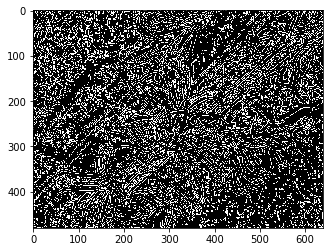

In [5]:
plt.imshow(dst,'gray')

In [6]:
def edgesMarrHildreth(img, sigma):
    size = int(2*(np.ceil(3*sigma))+1)
    x, y = np.meshgrid(np.arange(-size/2+1, size/2+1), np.arange(-size/2+1, size/2+1))
    normal = 1 / (2.0 * np.pi * sigma**2)
    # LoG filter
    kernel = ((x**2 + y**2 - (2.0*sigma**2)) / sigma**4) * np.exp(-(x**2+y**2) / (2.0*sigma**2)) / normal 
    kern_size = kernel.shape[0]
    log = np.zeros_like(img, dtype=float)
    # applying filter
    for i in range(img.shape[0]-(kern_size-1)):
        for j in range(img.shape[1]-(kern_size-1)):
            window = img[i:i+kern_size, j:j+kern_size] * kernel
            log[i,j] = np.sum(window)
    log = log.astype(np.int64, copy=False)
    zero_crossing = np.zeros_like(log)
    # computing zero crossing
    for i in range(log.shape[0]-(kern_size-1)):
        for j in range(log.shape[1]-(kern_size-1)):
            if log[i][j] == 0:
                if (log[i][j-1] < 0 and log[i][j+1] > 0) or \
                (log[i][j-1] < 0 and log[i][j+1] < 0) or \
                (log[i-1][j] < 0 and log[i+1][j] > 0) or \
                (log[i-1][j] > 0 and log[i+1][j] < 0):
                    zero_crossing[i][j] = 255
                if log[i][j] < 0:
                    if (log[i][j-1] > 0) or (log[i][j+1] > 0) or (log[i-1][j] > 0) or (log[i+1][j] > 0):
                        zero_crossing[i][j] = 255 
    return zero_crossing

In [7]:
dst = edgesMarrHildreth(gray,1.5)

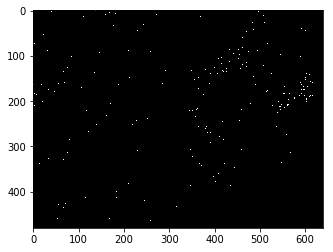

In [8]:
plt.imshow(dst,'gray')

In [11]:
def edgesMarrHildreth2(src):
    kernel = np.array([
        [0.0,0.0,-1.0,0.0,0.0],
        [0.0,-1.0,-2.0,-1.0,0.0],
        [-1.0,-2.0,16,-2.0,-1.0],
        [0.0,-1.0,-2.0,-1.0,0.0],
        [0.0,0.0,-1.0,0.0,0.0],
    ])
    dst = cv2.filter2D(src,-1,kernel)
    return dst

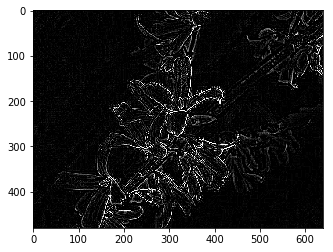

In [12]:
dst = edgesMarrHildreth2(gray)
plt.imshow(dst,'gray')

参考：

[1]. https://blog.csdn.net/a664607530/article/details/79318564